In [220]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D

import pandas as pd 
import os

In [221]:
train_ds= tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(32,32))

Found 33984 files belonging to 4 classes.
Using 27188 files for training.


In [222]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(32,32))

Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [223]:
class_names = train_ds.class_names
print(class_names)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


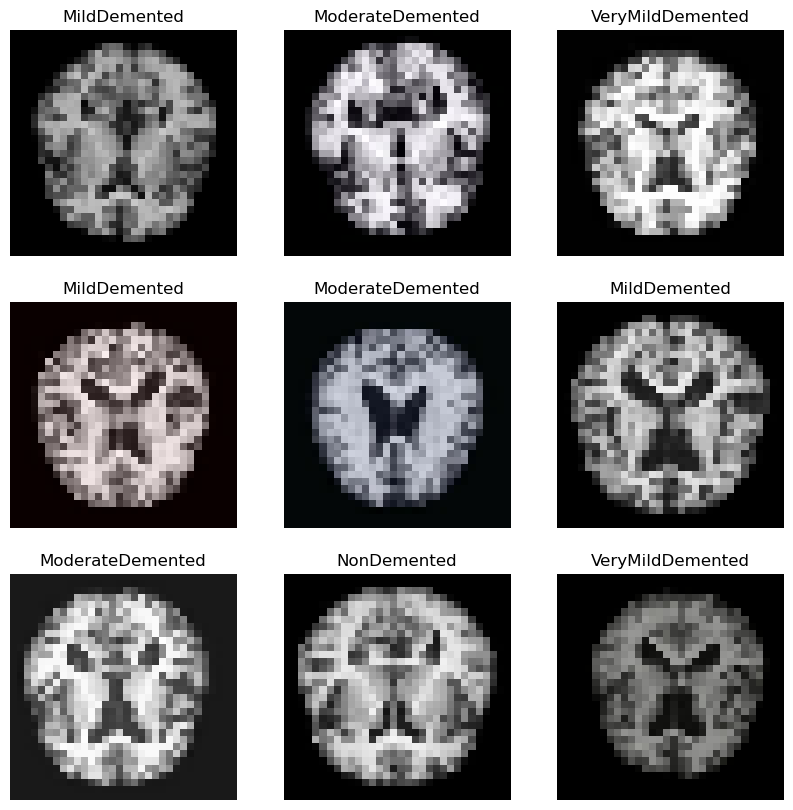

In [224]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [225]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [226]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [227]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_24 (Flatten)        (None, 1024)            

In [228]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history= model.fit(train_ds, epochs=7, 
                   validation_data=(val_ds))

Epoch 1/7
850/850 [==============================] - 33s 37ms/step - loss: 1.4386 - accuracy: 0.5210 - val_loss: 0.7598 - val_accuracy: 0.6398
Epoch 2/7
850/850 [==============================] - 31s 37ms/step - loss: 0.7919 - accuracy: 0.6439 - val_loss: 0.7621 - val_accuracy: 0.6570
Epoch 3/7
850/850 [==============================] - 32s 37ms/step - loss: 0.6905 - accuracy: 0.6945 - val_loss: 0.7384 - val_accuracy: 0.6687
Epoch 4/7
850/850 [==============================] - 32s 37ms/step - loss: 0.6249 - accuracy: 0.7270 - val_loss: 0.5279 - val_accuracy: 0.7594
Epoch 5/7
850/850 [==============================] - 32s 37ms/step - loss: 0.5876 - accuracy: 0.7464 - val_loss: 0.8466 - val_accuracy: 0.6570
Epoch 6/7
850/850 [==============================] - 32s 37ms/step - loss: 0.5473 - accuracy: 0.7655 - val_loss: 0.4432 - val_accuracy: 0.8211
Epoch 7/7
850/850 [==============================] - 31s 36ms/step - loss: 0.5155 - accuracy: 0.7822 - val_loss: 0.4223 - val_accuracy: 0.8188

850/850 - 14s - loss: 0.4300 - accuracy: 0.8191 - 14s/epoch - 16ms/step


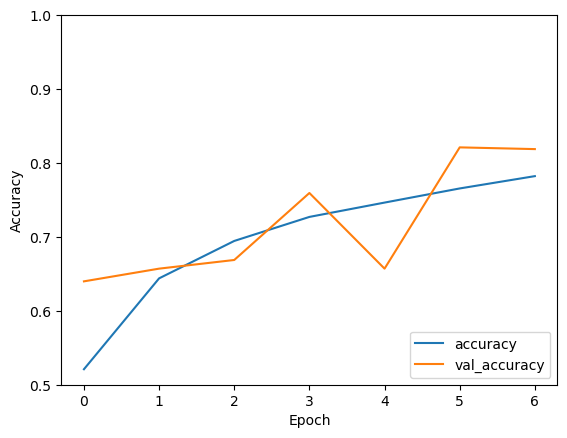

In [229]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(train_ds, verbose=2)


In [230]:
print(test_acc)

0.8190745711326599
